In [0]:
# !pip install pycaret

In [0]:
!pip install scikit-learn==0.21
!pip install fastai==0.7.0

     |████████████████████████████████| 6.6MB 2.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 122kB 2.8MB/s 
     |████████████████████████████████| 1.5MB 11.5MB/s 
     |████████████████████████████████| 496.4MB 25kB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp36-cp36m-linux_x86_64.whl size=2664858 sha256=87636084c1e39794660077e2b2ef6669d99560067c2bcd55a880ba38e4a332d6
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz
ERROR: torchvision 0.6.0+cu101 has requirement torch==1.5.0, but you'll have torch 0.3.1 which is incompatible.
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
    

In [0]:
from fastai.structured import *
from fastai.imports import *
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
PATH = "drive/My Drive/"

In [0]:
import pandas as pd
import numpy as np

In [0]:
train_df = pd.read_csv(f'{PATH}Upvotes_AnalyticsVidhya/train_NIR5Yl1.csv')
test_df = pd.read_csv(f'{PATH}Upvotes_AnalyticsVidhya/test_8i3B3FC.csv')
submission = pd.read_csv(f'{PATH}Upvotes_AnalyticsVidhya/sample_submission_OR5kZa5.csv')

In [0]:
train_df.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [0]:
train = train_df.copy()
test = test_df.copy()

In [0]:
def display_all(df):
  with pd.option_context("display.max_rows",1000):
    display(df)

In [0]:
train_df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [0]:
train_df['Username'].nunique() / len(train_df)

0.4296444424245179

In [0]:
display_all(train_df.isnull().sum())

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [0]:
display_all(test_df.isnull().sum())

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64

In [0]:
train_df.dtypes

ID              int64
Tag            object
Reputation    float64
Answers       float64
Username        int64
Views         float64
Upvotes       float64
dtype: object

In [0]:
??train_cats

In [0]:
train_cats(train_df)

In [0]:
??apply_cats

In [0]:
apply_cats(test_df,train_df)

In [0]:
train_df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [0]:
def rmsle(x,y):
  return np.sqrt(((x-y) ** 2).mean())

def print_score(m):
  all_metrics = [rmsle(m.predict(x_train),y_train), rmsle(m.predict(x_valid),y_valid),
                 m.score(x_train,y_train),m.score(x_valid,y_valid)]
  if hasattr(m,"oob_score_"):
    all_metrics.append(m.oob_score_)
  return all_metrics 

## Baseline Random forest regressor

In [0]:
from sklearn.preprocessing import Binarizer

In [0]:
train_df['Answers'].describe()

count    330045.000000
mean          3.917672
std           3.579515
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          76.000000
Name: Answers, dtype: float64

In [0]:
binary = Binarizer(threshold=4)
train_df['binary_ans'] = binary.transform([train_df['Answers']])[0]
test_df['binary_ans'] = binary.transform([test_df['Answers']])[0]

In [0]:
binary = Binarizer(threshold=4)
train_df['binary_ans'] = binary.transform([train_df['Answers']])[0]
test_df['binary_ans'] = binary.transform([test_df['Answers']])[0]

In [0]:
train_df.drop("Answers",axis=1,inplace=True)
test_df.drop("Answers",axis=1,inplace=True)

In [0]:
train_df.head()

,ID,Tag,Reputation,Username,Views,Upvotes,binary_ans
0,52664,a,3942.0,155623,7855.0,42.0,0.0
1,327662,a,26046.0,21781,55801.0,1175.0,1.0
2,468453,c,1358.0,56177,8067.0,60.0,0.0
3,96996,a,264.0,168793,27064.0,9.0,0.0
4,131465,c,4271.0,112223,13986.0,83.0,0.0


In [0]:
train_df.describe()

,ID,Reputation,Username,Views,Upvotes,binary_ans
count,330045.000000,3.300450e+05,330045.000000,3.300450e+05,330045.000000,330045.000000
mean,235748.682789,7.773147e+03,81442.888803,2.964507e+04,337.505358,0.286143
std,136039.418471,2.706141e+04,49215.100730,8.095646e+04,3592.441135,0.451958
min,1.000000,0.000000e+00,0.000000,9.000000e+00,0.000000,0.000000
25%,117909.000000,2.820000e+02,39808.000000,2.594000e+03,8.000000,0.000000
50%,235699.000000,1.236000e+03,79010.000000,8.954000e+03,28.000000,0.000000
75%,353620.000000,5.118000e+03,122559.000000,2.687000e+04,107.000000,1.000000
max,471493.000000,1.042428e+06,175738.000000,5.231058e+06,615278.000000,1.000000


In [0]:
X_train, y_train, _ = proc_df(train_df,y_fld="Upvotes")

In [0]:
X_test, _, _ = proc_df(test_df)

In [0]:
tags_df = pd.get_dummies(X_train['Tag'])
X_train = pd.concat([X_train,tags_df],axis=1)
X_train.drop("Tag",axis=1,inplace=True)

tags_df = pd.get_dummies(X_test['Tag'])
X_test = pd.concat([X_test,tags_df],axis=1)
X_test.drop("Tag",axis=1,inplace=True)

In [0]:
X_train.head()

,ID,Reputation,Username,Views,binary_ans,1,2,3,4,5,6,7,8,9,10
0,52664,3942.0,155623,7855.0,0.0,1,0,0,0,0,0,0,0,0,0
1,327662,26046.0,21781,55801.0,1.0,1,0,0,0,0,0,0,0,0,0
2,468453,1358.0,56177,8067.0,0.0,0,1,0,0,0,0,0,0,0,0
3,96996,264.0,168793,27064.0,0.0,1,0,0,0,0,0,0,0,0,0
4,131465,4271.0,112223,13986.0,0.0,0,1,0,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
X_test.head()

,ID,Reputation,Username,Views,binary_ans,1,2,3,4,5,6,7,8,9,10
0,366953,5645.0,50652,33200.0,0.0,1,0,0,0,0,0,0,0,0,0
1,71864,24511.0,37685,2730.0,1.0,0,1,0,0,0,0,0,0,0,0
2,141692,927.0,135293,21167.0,0.0,0,0,0,1,0,0,0,0,0,0
3,316833,21.0,166998,18528.0,1.0,0,0,0,1,0,0,0,0,0,0
4,440445,4475.0,53504,57240.0,1.0,0,0,0,1,0,0,0,0,0,0


In [0]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train,y_train)
m.score(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.978666966429377

In [0]:
m.feature_importances_

array([0.0128 , 0.57798, 0.01122, 0.38571, 0.0003 , 0.00132, 0.0009 , 0.00287, 0.00005, 0.00561, 0.00002,
       0.00088, 0.00001, 0.00027, 0.00007])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train.drop(["ID",'Username'],axis=1,inplace=True)

In [0]:
X_train.head()

,Reputation,Views,binary_ans,1,2,3,4,5,6,7,8,9,10
0,3942.0,7855.0,0.0,1,0,0,0,0,0,0,0,0,0
1,26046.0,55801.0,1.0,1,0,0,0,0,0,0,0,0,0
2,1358.0,8067.0,0.0,0,1,0,0,0,0,0,0,0,0
3,264.0,27064.0,0.0,1,0,0,0,0,0,0,0,0,0
4,4271.0,13986.0,0.0,0,1,0,0,0,0,0,0,0,0


In [0]:
# X_train['Reputation'] = np.log(X_train['Reputation'])
# #X_train['Answers'] = np.log(X_train['Answers'])
# X_train['Views'] = np.log(X_train['Views'])
# X_train.replace(np.nan,0,inplace=True)
# X_train.replace(np.inf,0,inplace=True)
# X_train.replace(-np.inf,0,inplace=True)

# X_test['Reputation'] = np.log(X_test['Reputation'])
# #X_test['Answers'] = np.log(X_test['Answers'])
# X_test['Views'] = np.log(X_test['Views'])
# X_test.replace(np.nan,0,inplace=True)
# X_test.replace(np.inf,0,inplace=True)
# X_test.replace(-np.inf,0,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [0]:
x_train,x_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.3,random_state=88)

In [0]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)


In [0]:
x_valid = sc_x.transform(x_valid)

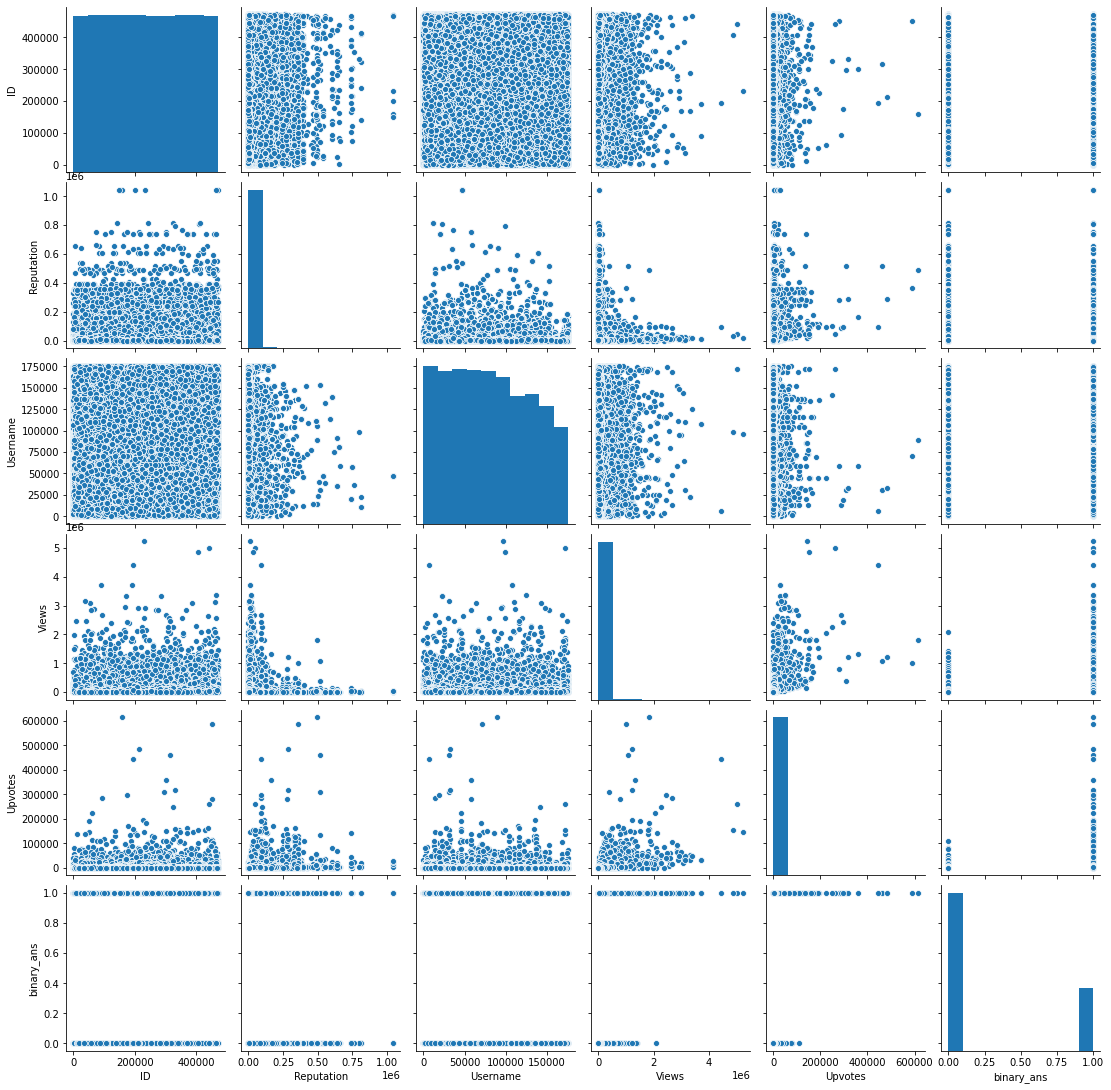

In [0]:
sns.pairplot(train_df)
plt.show()

In [0]:
import time
while 1:
  time.sleep(300)

KeyboardInterrupt: ignored

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4,interaction_only=False,include_bias=True)

In [0]:
X_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_train,y_train)
from sklearn.linear_model import LassoLars

In [0]:
import lightgbm as lgb

In [0]:
lgb_model = lgb.LGBMRegressor()

In [0]:
lgb_model.fit(X_poly,y_train)

KeyboardInterrupt: ignored

In [0]:
import time
while 1:
  time.sleep(300)

In [0]:
from sklearn.linear_model import LassoLarsCV

In [0]:
LassoLarsCV()

In [0]:
lin_reg1 = LassoLars(alpha=0.021,max_iter=200)
lin_reg1.fit(X_poly,y_train)

LassoLars(alpha=0.021, copy_X=True, eps=2.220446049250313e-16,
          fit_intercept=True, fit_path=True, max_iter=200, normalize=True,
          positive=False, precompute='auto', verbose=False)

In [0]:
import xgboost as xgb

In [0]:
xgb_model = xgb.XGBRegressor(max_depth=10,n_estimators = 10)

In [0]:
xgb_model.fit(X_poly,y_train)

[04:35:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
import time
while 1:
  time.sleep(300)

In [0]:
m = RandomForestRegressor(n_estimators = 3 ,n_jobs=-1,oob_score=True)
m.fit(X_poly,y_train)
m.score()

KeyboardInterrupt: ignored

In [0]:
ID = X_test['ID']

In [0]:
X_test.drop(["ID",'Username'],axis=1,inplace=True)

In [0]:
X_test = sc_x.fit_transform(X_test)
X_test_poly = poly_reg.fit_transform(X_test)
prediction = lin_reg1.predict(X_test_poly)
prediction = abs(prediction)
sub = pd.DataFrame({"ID":ID,'Upvotes':prediction})
sub.to_csv("submission_polynomial2.csv",index=False)

In [0]:
m = RandomForestRegressor(n_estimators = 40,n_jobs=-1,oob_score=True)
m.fit(x_train,y_train)
print_score(m)

[531.838078282855,
 1455.7912267921884,
 0.9771983067241402,
 0.8494150315608764,
 0.8375404328982075]

In [0]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor(n_estimators=40,oob_score=True,bootstrap=True)
et.fit(x_train,y_train)
print_score(et)

[518.4892993245998,
 1387.9078422119671,
 0.9783285566047223,
 0.8631311286313513,
 0.8526717589441609]

In [0]:
x_train.head()

,Reputation,Username,Views,binary_ans,1,2,3,4,5,6,7,8,9,10
163385,6.318968,34048,9.845435,0.0,1,0,0,0,0,0,0,0,0,0
228468,9.170768,132291,9.856972,0.0,0,0,0,0,0,0,1,0,0,0
8020,9.316141,103392,8.714075,0.0,0,0,0,1,0,0,0,0,0,0
286944,8.374015,114672,10.410667,0.0,0,0,0,0,1,0,0,0,0,0
111166,6.093570,65007,11.782624,0.0,0,0,0,0,1,0,0,0,0,0


In [0]:
x_train.head()

,Reputation,Username,Views,binary_ans,1,2,3,4,5,6,7,8,9,10
163385,6.318968,34048,9.845435,0.0,1,0,0,0,0,0,0,0,0,0
228468,9.170768,132291,9.856972,0.0,0,0,0,0,0,0,1,0,0,0
8020,9.316141,103392,8.714075,0.0,0,0,0,1,0,0,0,0,0,0
286944,8.374015,114672,10.410667,0.0,0,0,0,0,1,0,0,0,0,0
111166,6.093570,65007,11.782624,0.0,0,0,0,0,1,0,0,0,0,0


In [0]:
preds = np.stack([t.predict(x_valid) for t in et.estimators_])

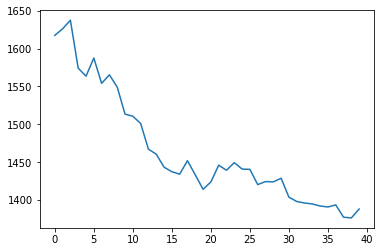

In [0]:
plt.plot([rmsle(y_valid,np.mean(preds[:i+1],axis=0)) for i in range(40)])

In [0]:
submission.head()

,ID,Upvotes
0,7,500
1,9,500
2,12,500
3,13,500
4,16,500


In [0]:
# X_test['Reputation'] = np.log(X_test['Reputation'])
# X_test['Answers'] = np.log(X_test['Answers'])
# X_test['Views'] = np.log(X_test['Views'])
# X_test.replace(np.nan,0,inplace=True)
# X_test.replace(np.inf,0,inplace=True)
# X_test.replace(-np.inf,0,inplace=True)

In [0]:
X_test.drop("ID",axis=1,inplace=True)

In [0]:
X_test.head()

,Reputation,Username,Views,binary_ans,1,2,3,4,5,6,7,8,9,10
0,8.638525,50652,10.410305,0.0,1,0,0,0,0,0,0,0,0,0
1,10.106877,37685,7.912057,1.0,0,1,0,0,0,0,0,0,0,0
2,6.831954,135293,9.960199,0.0,0,0,0,1,0,0,0,0,0,0
3,3.044522,166998,9.827038,1.0,0,0,0,1,0,0,0,0,0,0
4,8.406262,53504,10.955008,1.0,0,0,0,1,0,0,0,0,0,0


In [0]:
y_pred_rf = m.predict(X_test)
y_pred_et = et.predict(X_test)

In [0]:
y_pred = (y_pred_rf + y_pred_et) / 2

In [0]:
prediction = pd.DataFrame(y_pred,columns = ["Upvotes"])

In [0]:
submission_file = pd.concat([test_df['ID'],prediction],axis=1)
submission_file.to_csv("fast_submission_v8.csv",index=False)

In [0]:
submission_file.shape

(141448, 2)

In [0]:
x_train.columns

Index(['Reputation', 'Username', 'Views', 'binary_ans', 1, 2, 3, 4, 5, 6, 7, 8,
       9, 10],
      dtype='object')

In [0]:
m.feature_importances_

array([0.59914, 0.01662, 0.37025, 0.00043, 0.00166, 0.00368, 0.00096, 0.00006, 0.00548, 0.00002, 0.00125,
       0.00001, 0.00039, 0.00004])

In [0]:
sns.regplot(train_df['Answers'],train_df['Reputation'])
plt.show()

KeyError: ignored

##  Pycaret

In [0]:
from pycaret.regression import *

In [0]:
reg = setup(train,target="Upvotes",train_size=0.7)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1558
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(330045, 7)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [0]:
et = create_model(estimator="et")


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,138.7554,6.306420e+06,2511.2586,0.7757,0.9119,1.5169
1,108.4122,8.075189e+05,898.6206,0.9057,0.9006,1.4158
2,142.4061,7.499953e+06,2738.6042,0.7969,0.9211,2.2033
3,130.6507,5.180591e+06,2276.0911,0.8591,0.9149,1.4668
4,102.5519,6.040521e+05,777.2079,0.9048,0.9181,1.4937
5,96.0887,5.393061e+05,734.3746,0.8729,0.9060,1.4992
6,106.9463,6.554493e+05,809.5982,0.8870,0.9103,1.4490
7,115.3291,2.231264e+06,1493.7417,0.8213,0.8995,1.4469
8,116.9011,8.588030e+05,926.7163,0.8548,0.9059,1.4590
9,105.7815,8.443867e+05,918.9052,0.9573,0.9043,1.4577


In [0]:
unseen_predictions = predict_model(et, data=test, round=0)

In [0]:
unseen_predictions[['ID','Label']].rename(columns={'Label':'Upvotes'}).to_csv('pycaret_et.csv', index=False)